<a href="https://colab.research.google.com/github/HusseinWaleed1/Assignment-Team-2/blob/main/house_prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [54]:
url = "https://raw.githubusercontent.com/HusseinWaleed1/Assignment-Team-2/refs/heads/main/house_prediction_pr/datasets/train%20(1).csv"
df = pd.read_csv(url)

In [55]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
# checking the number of rows and Columns in the data frame
df.shape

(1460, 81)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [58]:
# check for missing values
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


Imputation

In [59]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1455,False
1456,False
1457,False
1458,False


In [60]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [61]:
# statistical measures of the dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [62]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
df = df.drop('Id', axis=1)

Understanding the correlation between various features in the dataset

Positive Correlation

Negative Correlation

In [64]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Splitting the data and Target

In [65]:
# Splitting the data and Target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [66]:
print(y)
print('*'*50)
print(X)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64
**************************************************
      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458      

In [67]:
# Identify column types
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

Categorical Features (Fillna + Encoding)

Encoding by using OneHotEncoder

In [68]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify column types after splitting
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),  # scale numbers
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)  # encode categories
    ]
)

In [69]:
# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [70]:
print(y)
print('*'*50)
print(X)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64
**************************************************
      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458      

In [71]:
# This cell is no longer needed as the split is done in cell 4bYxqWy1e7ws

In [72]:
print(X.shape, X_train.shape, X_test.shape)

(1460, 79) (1168, 79) (292, 79)


In [73]:
print("Columns in dataset:\n", df.columns.tolist())
print(len(df.columns.tolist()))

Columns in dataset:
 ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Pool

In [74]:
# Track original columns
original_cols = set(df.columns)

# 1. House Age Ratios
if "HouseAge" in df.columns:
    if "TotRmsAbvGrd" in df.columns:
        df["AgePerRoom"] = df["HouseAge"] / (df["TotRmsAbvGrd"] + 1)
    if "OverallQual" in df.columns:
        df["AgePerQuality"] = df["HouseAge"] / (df["OverallQual"] + 1)

# 2. Remodel Impact
if {"RemodAge","HouseAge"}.issubset(df.columns):
    df["RemodelAgeRatio"] = df["RemodAge"] / (df["HouseAge"] + 1)

# 3. Basement Features
if "TotalBsmtSF" in df.columns:
    df["HasBasement"] = (df["TotalBsmtSF"] > 0).astype(int)
if {"BsmtFullBath","BsmtHalfBath","TotalBsmtSF"}.issubset(df.columns):
    df["BsmtBathRatio"] = (df["BsmtFullBath"] + 0.5*df["BsmtHalfBath"]) / (df["TotalBsmtSF"] + 1)

# 4. Floor Space Interactions
if {"GrLivArea","TotRmsAbvGrd"}.issubset(df.columns):
    df["LivingSFPerRoom"] = df["GrLivArea"] / (df["TotRmsAbvGrd"] + 1)
if {"1stFlrSF","2ndFlrSF"}.issubset(df.columns):
    df["FirstSecondFlrRatio"] = (df["1stFlrSF"] + 1) / (df["2ndFlrSF"] + 1)

# 5. Garage / Parking
garage_map = {"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1}
if "GarageQual" in df.columns:
    df["GarageQualScore"] = df["GarageQual"].map(garage_map).fillna(0)
if "GarageCond" in df.columns:
    df["GarageCondScore"] = df["GarageCond"].map(garage_map).fillna(0)
if {"GarageQualScore","GarageCondScore"}.issubset(df.columns):
    df["GarageScore"] = df["GarageQualScore"] + df["GarageCondScore"]

# 6. Neighborhood Quality Proxy
if {"Neighborhood","OverallQual"}.issubset(df.columns):
    df["NeighborhoodQual"] = df.groupby("Neighborhood")["OverallQual"].transform("mean")

# 7. Age Adjusted Score
if {"HouseAge","OverallQual"}.issubset(df.columns):
    df["AgeAdjustedScore"] = df["OverallQual"] / (df["HouseAge"] + 1)

# 8. Luxury Flags
if "PoolArea" in df.columns:
    df["HasPool"] = (df["PoolArea"] > 0).astype(int)
if "2ndFlrSF" in df.columns:
    df["Has2ndFlr"] = (df["2ndFlrSF"] > 0).astype(int)
if "PorchSF" in df.columns:
    df["HasPorch"] = (df["PorchSF"] > 0).astype(int)

# Report new features
new_cols = set(df.columns) - original_cols
print("Successfully added new features:", new_cols)


Successfully added new features: {'HasPool', 'Has2ndFlr', 'FirstSecondFlrRatio', 'GarageCondScore', 'BsmtBathRatio', 'GarageScore', 'LivingSFPerRoom', 'NeighborhoodQual', 'GarageQualScore', 'HasBasement'}


In [75]:
print("Columns in dataset:\n", df.columns.tolist())
print(len(df.columns.tolist()))

Columns in dataset:
 ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Pool

In [76]:
numeric_feats = df.select_dtypes(include=[np.number])

# Compute correlation with SalePrice
correlation = numeric_feats.corr()["SalePrice"].sort_values(ascending=False)

print("Top 15 correlated features with SalePrice:")
print(correlation.head(15))

Top 15 correlated features with SalePrice:
SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
NeighborhoodQual    0.704346
GarageCars          0.640409
GarageArea          0.623431
LivingSFPerRoom     0.616235
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
GarageYrBlt         0.486362
MasVnrArea          0.477493
Name: SalePrice, dtype: float64


In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare data
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode categoricals after splitting
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)

# Train RandomForest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print("Top 20 features ranked by  RandomForest:")
print(importances.head(20))

Top 20 features ranked by  RandomForest:
OverallQual            0.511641
GrLivArea              0.103839
NeighborhoodQual       0.090363
1stFlrSF               0.032007
TotalBsmtSF            0.029721
2ndFlrSF               0.028413
BsmtFinSF1             0.024703
LotArea                0.014625
GarageArea             0.012650
LivingSFPerRoom        0.011569
GarageCars             0.011469
FirstSecondFlrRatio    0.007962
LotFrontage            0.007651
YearBuilt              0.007464
YearRemodAdd           0.006943
TotRmsAbvGrd           0.005845
GarageYrBlt            0.005785
BsmtUnfSF              0.004709
BsmtQual_Gd            0.004444
OpenPorchSF            0.003850
dtype: float64


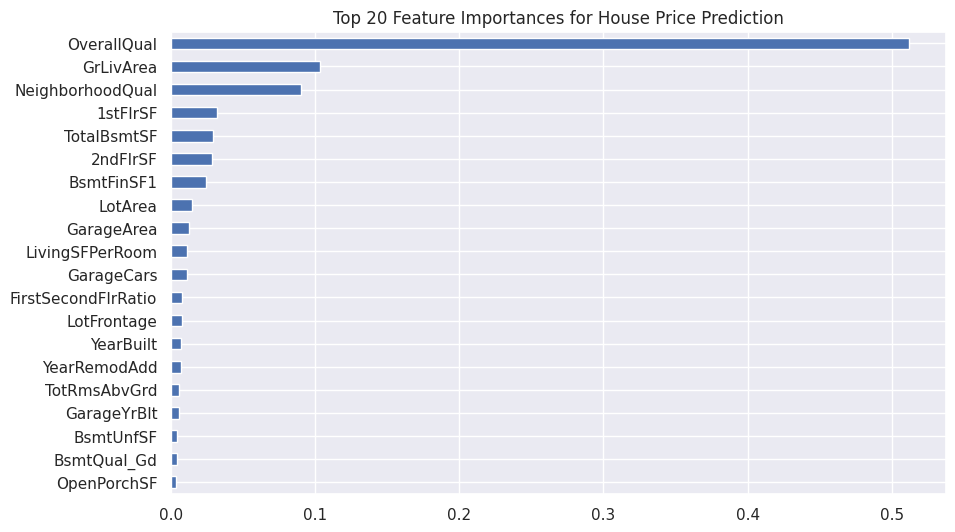

In [78]:
import matplotlib.pyplot as plt

top_feats = importances.head(20)

plt.figure(figsize=(10,6))
top_feats.plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances for House Price Prediction")
plt.show()

In [79]:
# loading the model
from xgboost import XGBRegressor
model = XGBRegressor()

In [80]:
# training the model with X_train
model.fit(X_train_processed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [81]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train_processed)

In [82]:
print(training_data_prediction)

[144369.81  180026.78   96734.37  ... 123155.875 188852.34  172635.83 ]


In [83]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9904685020446777
Mean Absolute Error :  5402.11572265625


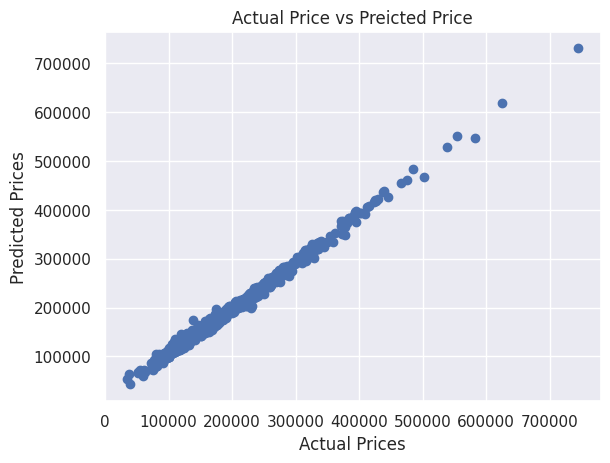

In [84]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [85]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test_processed)

In [86]:
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  -0.29070913791656494
Mean Absolute Error :  70956.1796875
